# Clustering for dataset exploration
Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this chapter, you'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

In [1]:
from IPython.display import HTML, Image
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Unsupervised_learning.mp4" type="video/mp4">
</video>

## Unsupervised learning

- Unsupervised learning is a class of machine learning techniques for discovering patterns in data
- E.g. clustering customers by their purchases
- Compressing the data using purchase patterns (dimension reduction)

## Supervised vs unsupervised learning
- *Supervised* learning finds patterns for a prediction task
    - E.g. classify tumors as benign or cancerous (labels)
- *Unsupervised* learning finds patterns in data
    - ... but without a specific prediction task in mind

## Iris dataset
- Measurements of many iris plants
- 3 species of iris: setosa, versicolor, virginica
- Petal length, petal width, sepal length, sepal width (the features of the dataset)

![][iris]

## **Remember** Arrays, features & samples
- 2D NumPy array
- Columns are measurements (the features or predictors)
- Rows represent iris plants (the samples)

## Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space
- **Dimension =** number of features
- Dimension too high to visualize!
- ... but unsupervised learning gives insight

## [k-means clustering][1]
- Finds clusters of samples
- Number of clusters must be specified
- Implemented in `sklearn` ("scikit-learn")

## Cluster labels for new samples
- New samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "centroids")
- Finds the nearest centroid to each new sample

[iris]: _Docs/iris.png
[1]: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

### How many clusters?
You are given an array `points` of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

`matplotlib.pyplot` has already been imported as `plt`. In the IPython Shell:

- Create an array called `xs` that contains the values of `points[:,0]` - that is, column `0` of `points`.
- Create an array called `ys` that contains the values of `points[:,1]` - that is, column `1` of `points`.
- Make a scatter plot by passing `xs` and `ys` to the `plt.scatter()` function.
- Call the `plt.show()` function to show your plot.

How many clusters do you see?

In [3]:
points = np.array(pd.read_csv('../_datasets/points.csv'))

print(type(points))
points[:5]

<class 'numpy.ndarray'>


array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296]])

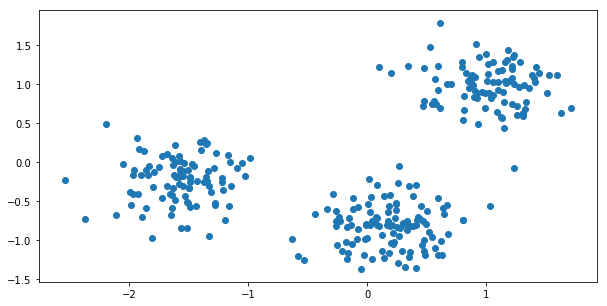

In [4]:
# selecting all observations from the feature x, remember in numpy [rows,columns] 
xs = points[:,0]

# selecting all observations from the feature y, remember in numpy [rows,columns] 
ys = points[:,1]

# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(xs,ys)
plt.show()

**The scatter plot suggests that there are 3 distinct clusters.**

### Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array `points` from the previous exercise, and also an array `new_points`.

In [5]:
new_points = np.array(pd.read_csv('../_datasets/new_points.csv'))

In [6]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. 

### Inspect your clustering
Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and `labels` is the array of their cluster labels.

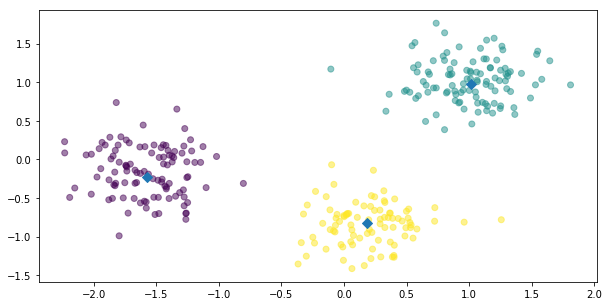

In [7]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=(10,5))
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering? The next video will explain how to evaluate a clustering!

## Evaluating a clustering

- Can check correspondence with e.g. iris species
- … but what if there are no species to check against?
- Measure quality of a clustering
- Informs choice of how many clusters to look for

In [8]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Evaluating_a_clustering.mp4" type="video/mp4">
</video>

## Iris: clusters vs species
- k-means found 3 clusters amongst the iris samples
- Do the clusters correspond to the species?

## Cross tabulation with pandas
- Clusters vs species is a "cross-tabulation"
- Use the pandas library
- Given the species of each sample as a list species

## Measuring clustering quality
- Using only samples and their cluster labels
- A good clustering has tight clusters
- ... and samples in each cluster bunched together

## Inertia measures clustering quality
- Measures how spread out the clusters are (*lower* is better)
- Distance from each sample to centroid of its cluster
- After **fit()**, available as attribute **inertia_**
- k-means attempts to minimize the inertia when choosing clusters

## The number of clusters
- Clusterings of the iris dataset with different numbers of clusters
- More clusters means lower inertia
- What is the best number of clusters?
![][inertia]

## How many clusters to choose?
- A good clustering has tight clusters (so low inertia)
- ... but not too many clusters!
- Choose an "elbow" in the inertia plot
- Where inertia begins to decrease more slowly
- E.g. for iris dataset, 3 is a good choice

[inertia]: _Docs/inertia.png

### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

`KMeans` and `PyPlot` (`plt`) have already been imported for you.

This dataset was sourced from the **[UCI Machine Learning Repository][1]**.

[1]: https://archive.ics.uci.edu/ml/datasets/seeds

In [9]:
grains = np.array(pd.read_csv('../_datasets/Grains/seeds.csv', header=None))
samples = grains[:,:-1]

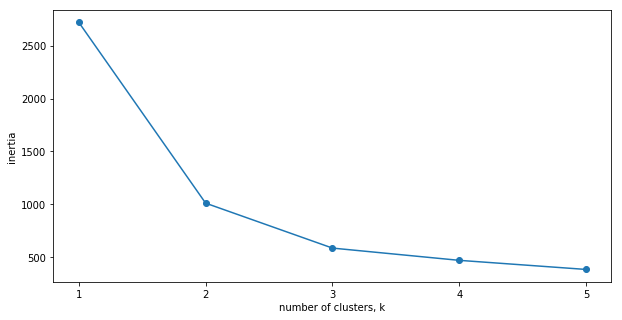

In [10]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample. Pandas (`pd`) and `KMeans` have already been imported for you.

In [11]:
# 3 different grain varieties: "Kama", "Rosa" and "Canadian". Using list comprehensions and nested ternary operator pythonic
varieties = ['Kama wheat' if e == 1 else 'Rosa wheat' if e ==2 else 'Canadian wheat'  for e in grains[:,-1] ]

In [12]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. **But depending on the type of data you are working with, the clustering may not always be this good**. Is there anything you can do in such situations to improve your clustering?

## Transforming features for better clusterings


In [13]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-Transforming_features_for_better_clusterings.mp4" type="video/mp4">
</video>

## Piedmont wines dataset
- 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
- Features measure chemical composition e.g. alcohol content
- … also visual properties like “color intensity” Source: h

## Clusters vs. varieties

```Python 
     In [4]: df = pd.DataFrame({'labels': labels, 'varieties': varieties})
     In [5]: ct = pd.crosstab(df['labels'], df['varieties'])
     In [6]: print(ct)
     varieties  Barbera   Barolo   Grignolino
     labels 
     0               29       13           20
     1               0        46            1
     2               19        0           50
```
## Feature variances
- The wine features have very different variances!
- Variance of a feature measures spread of its values

![][Feature_variances]

## StandardScaler
- In kmeans: feature variance = feature influence
- StandardScaler transforms each feature to have mean 0 and variance 1
- Features are said to be "standardized"

![][StandardScaler]

## Similar methods
- StandardScaler and KMeans have similar methods
- Use fit() / transform() with StandardScaler
- Use fit() / predict() with KMeans

## StandardScaler, then KMeans
- Need to perform two steps: **StandardScaler**, then **KMeans**
- Use sklearn pipeline to combine multiple steps
- Data flows from one step into the next

## Feature standardization improves clustering

![][Feature_standardization]

## sklearn preprocessing steps
- **StandardScaler** is a "preprocessing" step
- **MaxAbsScaler** and **Normalizer** are other examples

[Feature_variances]: _Docs/Feature_variances.png
[StandardScaler]: _Docs/StandardScaler.png
[Feature_standardization]: _Docs/Feature_standardization.png

### Scaling fish data for clustering
You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from [the Journal of Statistics Education][1].

[1]: http://ww2.amstat.org/publications/jse/jse_data_archive.htm

In [14]:
fish = pd.read_csv('../_datasets/fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [15]:
samples = np.array(fish.drop(fish.columns[0], axis=1))
species = fish[fish.columns[0]].to_list()

In [16]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, `samples` is the 2D array of fish measurements. Your pipeline is available as `pipeline`, and the species of every fish sample is given by the list `species`.

In [17]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,0,0,0,13
1,33,0,1,0
2,0,17,0,0
3,1,0,19,1


It looks like the fish data separates really well into 4 clusters!

### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other.

`KMeans` and `make_pipeline` have already been imported for you.

In [18]:
stock_price_movements = pd.read_csv('../_datasets/company-stock-movements-2010-2015-incl.csv')
stock_price_movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [19]:
movements = np.array(stock_price_movements.drop(stock_price_movements.columns[0], axis=1))
companies = stock_price_movements[stock_price_movements.columns[0]].to_list()

In [20]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

### Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline `pipeline` containing a `KMeans` model and fit it to the NumPy array `movements` of daily stock movements. In addition, a list `companies` of the company names is available.

In [21]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
df.sort_values('labels')

,labels,companies
53,0,Valero Energy
54,1,Walgreen
4,1,Boeing
29,1,Lookheed Martin
36,1,Northrop Grumman
48,2,Toyota
21,2,Honda
7,2,Canon
34,2,Mitsubishi
20,2,Home Depot


Take a look at the clusters. Are you surprised by any of the results? In the next chapter, you'll learn about how to communicate results such as this through visualizations.